### Imports

In [1]:
import sys
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 400)

import canalyst_candas.candas as cd
import canalyst_candas.candas_datareader as cdr
from canalyst_candas.configuration.config import Config

config_info = {
  "canalyst_api_key": "",
   "s3_access_key_id": "",
    "s3_secret_key": "",
    "fred_key": "",
  "default_dir": "",
  "mds_host": "",
  "wp_host": ""
}

config = Config(config=config_info)


A configuration file has been created for you in 
/Users/jedgore/canalyst/keys.json.


### How do we find auditable peer sets?
#### Search object: we're looking for Freight & Logistics companies

In [2]:
canalyst_search = cd.Search(config)
list(canalyst_search.search_time_series(ticker='',
                        sector="Freight|Logistics",
                     time_series_name='')['ticker'].unique())

Building search index...
No.of.unique tickers:  11
No.of.unique time series:  4681


['XPO US',
 'UPS US',
 'RLGT US',
 'HUBG US',
 'GXO US',
 'FWRD US',
 'FDX US',
 'EXPD US',
 'CHRW US',
 'ATSG US',
 'AAWW US']

### Logistics Carriers Stocks

In [3]:
logistics_carriers = ['JBHT US',
'EXPD US',
'CHRW US',
'LSTR US',
'FWRD US',
'HUBG US',
'RLGT US']

### Get all Key Drivers for each stock

In [4]:
logistics_modelset = cd.ModelSet(ticker_list = logistics_carriers, config=config)

### Get all common time series names for each stock in the ModelSet

In [5]:
common_names = logistics_modelset.common_time_series_names()
common_names

['MO_RIS_EPS_WAD',
 'MO_CFS_NetChange',
 'MO_CCFS_CFF',
 'MO_WCF_AP_Margin_Change',
 'MO_RIS_ShareCount_WAD',
 'MO_RIS_Tax_Current',
 'MO_RIS_SBC',
 'MO_VA_EVCalc_Prefs',
 'MO_KPI_Revenue_perEmployee',
 'MO_VA_EV_ToEBITDA',
 'MO_CFSum_NetShares',
 'MO_VA_FCFYield_ToEV',
 'MO_BS_SE',
 'MO_CFS_Balance_End',
 'MO_RIS_DisCont',
 'MO_BSS_Debt_Net',
 'MO_VA_StockPrice_TradingCurrency',
 'MO_RIS_NI_GAAP_Diluted',
 'MO_BSS_InterestRate_Debt',
 'MO_RIS_NI_ContinOp',
 'MO_CFSum_Dividend',
 'MO_VA_EVCalc_Other',
 'MO_BSS_Debt',
 'MO_RIS_EBITDA',
 'MO_BSS_NetInterestRate_Debt',
 'MO_CFS_FX',
 'MO_BS_Goodwill',
 'MO_RIS_NI_NONGAAP_Diluted',
 'MO_BS_CommonStock',
 'MO_BS_ContributedSurplus',
 'MO_RIS_Adjustments_Dilution_GAAP',
 'MO_BS_TA',
 'MO_CFSum_NetShares_Price',
 'MO_RIS_TaxRate_Deferred',
 'MO_RIS_EBT',
 'MO_BSS_Cash',
 'MO_BS_TL',
 'MO_CFS_Balance_Begin',
 'MO_IS_FirstRow',
 'MO_VA_StockPrice_High',
 'MO_BS_NCL',
 'MO_KPI_PurchasedTransportation',
 'MO_CCFS_Balance_End',
 'MO_IS_NI_ContinOp

### Visualize Total Revenue

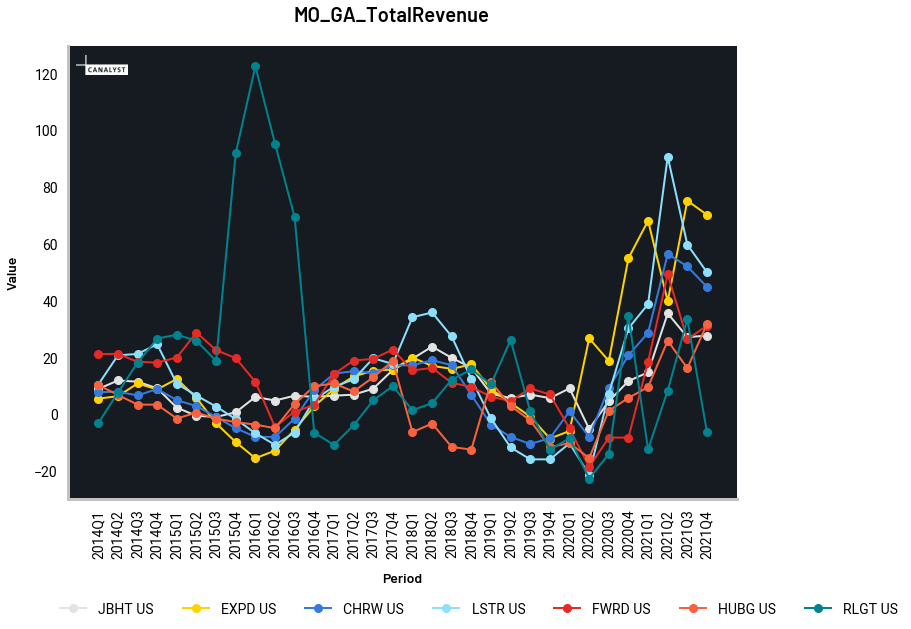

In [6]:
logistics_modelset.plot_time_series(logistics_carriers,'MO_GA_TotalRevenue',mrq_notation=False,axis_labels=[['Period','Value']])

### Create a ModelMap for one stock in the ModelSet

In [7]:
logistics_modelset.create_model_map(ticker='CHRW US',
                                    time_series_name="MO_RIS_REV",
                                    col_for_labels = "time_series_description",
                                    notebook=True).show() 


https://mds.canalyst.com/api/equity-model-series/J2UZZ20164/equity-models/FY2021.27/time-series/MO_RIS_REV/forecast-data-points/Q1-2022/drivers/?format=dot


### Vizualize revenue build for two stocks

<AxesSubplot:title={'center':'HUBG Revenue Mix'}>

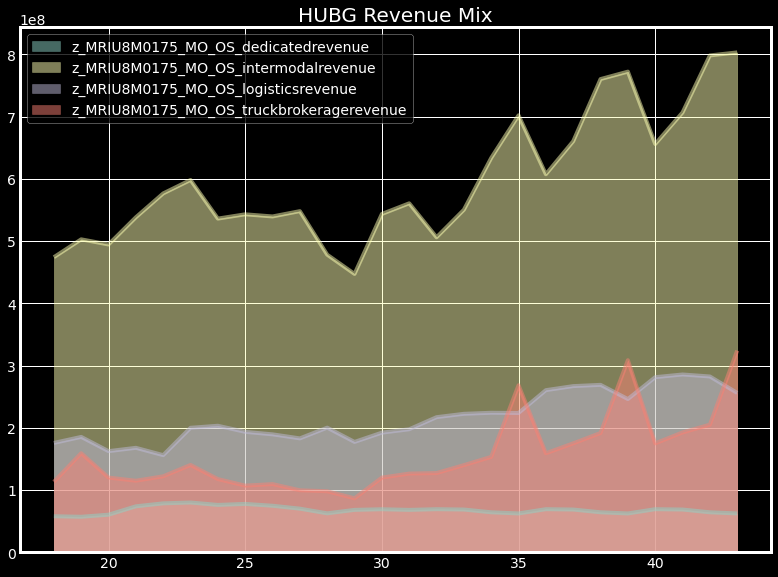

In [8]:
hubg_revs = ['z_MRIU8M0175_MO_OS_intermodalrevenue',
            'z_MRIU8M0175_MO_OS_truckbrokeragerevenue',
            'z_MRIU8M0175_MO_OS_logisticsrevenue',
            'z_MRIU8M0175_MO_OS_dedicatedrevenue']
df_hubg = logistics_modelset.model_frame(ticker='HUBG US',
                                period_duration_type='fiscal_quarter',
                               time_series_name=hubg_revs)
df_hubg
df_hubg = cd.unstack_dataframe(df_hubg,period_type='period_name_sorted').dropna()
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df_hubg.plot(kind='area', stacked=False,title="HUBG Revenue Mix")

<AxesSubplot:title={'center':'CHRW Revenue Mix'}>

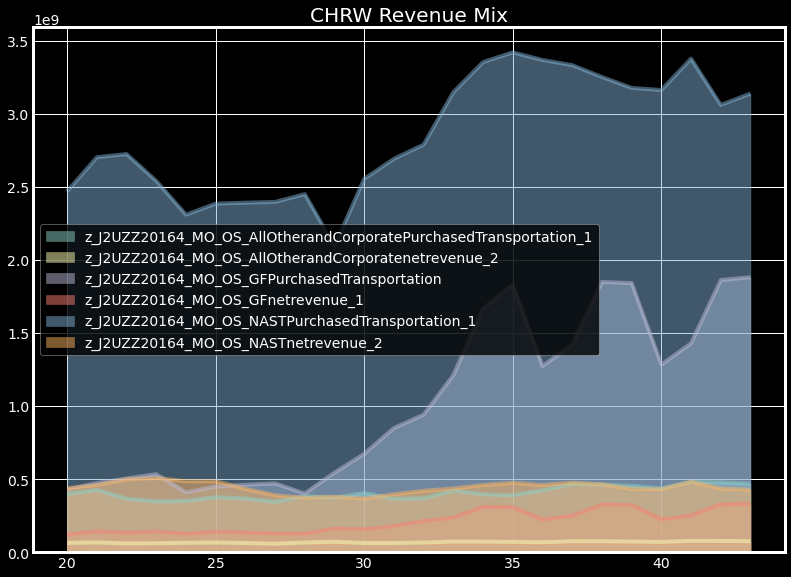

In [9]:
lstr_revs = ['z_J2UZZ20164_MO_OS_NASTPurchasedTransportation_1',
            'z_J2UZZ20164_MO_OS_NASTnetrevenue_2',
            'z_J2UZZ20164_MO_OS_GFPurchasedTransportation',
            'z_J2UZZ20164_MO_OS_GFnetrevenue_1',
             'z_J2UZZ20164_MO_OS_AllOtherandCorporatePurchasedTransportation_1',
             'z_J2UZZ20164_MO_OS_AllOtherandCorporatenetrevenue_2'
            ]
df_lstr = logistics_modelset.model_frame(ticker='CHRW US',
                                period_duration_type='fiscal_quarter',
                               time_series_name=lstr_revs)
df_lstr
df_lstr = cd.unstack_dataframe(df_lstr,period_type='period_name_sorted').dropna()
df_lstr.plot(kind='area', stacked=False,title="CHRW Revenue Mix")

### Investigate one KPI, Purchased Transportation, as a % of Revenues

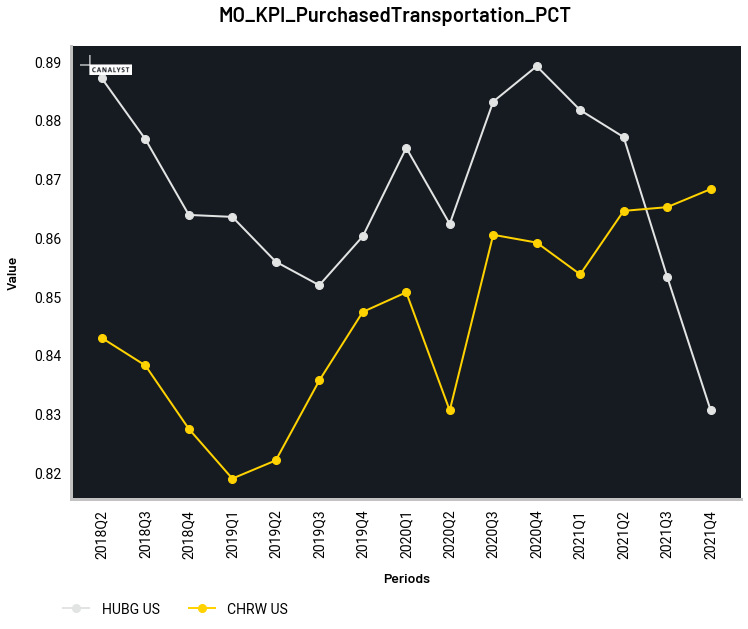

In [10]:
df = logistics_modelset.model_frame(time_series_name=['MO_KPI_PurchasedTransportation','MO_RIS_REV'],
                        period_duration_type='fiscal_quarter')[['ticker','period_name_sorted','time_series_name','value']]
df = cd.unstack_dataframe(df,period_type='period_name_sorted').dropna()
df = df.loc[df['period_name_sorted']>'2018Q1']
df['MO_KPI_PurchasedTransportation_PCT'] = df['MO_KPI_PurchasedTransportation']/df['MO_RIS_REV']
df = df.loc[(df['ticker']=='CHRW US') | (df['ticker']=='HUBG US')]
df['value']=df['MO_KPI_PurchasedTransportation_PCT']
df['time_series_name']=df['ticker']
df = cd.unstack_dataframe(df,period_type='period_name_sorted')
df1 = df.loc[df['CHRW US'].isna()]
df2= df.loc[df['HUBG US'].isna()]
df_plot = pd.merge(df1,df2,how='inner',left_on='period_name_sorted',right_on='period_name_sorted')
df_plot = df_plot.drop(columns=['ticker_x','ticker_y','CHRW US_x','HUBG US_y'])
df_plot.columns=df_plot.columns.str.replace('_x|_y','')

chart = cd.Chart(
    x_value=df_plot["period_name_sorted"],
    y_values=df_plot[['HUBG US','CHRW US']],
    labels=['HUBG US','CHRW US'],
    axis_labels=[["Periods", "Value"]],
    title='MO_KPI_PurchasedTransportation_PCT',
)
chart.show()

### Search for common key statistics between these two stocks

In [11]:
canalyst_search = cd.Search(config)
canalyst_search.kpi_statistics('CHRW US','HUBG US')

,ticker_y,ticker_x,time_series_description_y,time_series_description_x,time_series_name_y,time_series_name_x,rsquared,subsector
13763,CHRW US,HUBG US,"Y/Y NAST LTL net revenue growth, %","Hub Intermodal revenue growth, %",z_J2UZZ20164_MO_OS_NASTLTLnetrevenuegrowth,z_MRIU8M0175_MO_OS_hubintermodalrevenuegrowth,0.89,Air Freight _ Logistics


### Are these key statistical matches also drivers?

In [12]:
canalyst_search.search_time_series(['HUBG US','CHRW US'],
                                   time_series_name='intermodal|NASTL',
                                  is_driver=True)

Building search index...
No.of.unique tickers:  2
No.of.unique time series:  3


,ticker,time_series_description,time_series_name,is_driver,category,Path,Filename,period_duration_type,unit_type,value,CSIN,search_matches
845858,HUBG US,"Intermodal Revenue, mm",MO_KPI_REV_Intermodal,True,Key Metrics - Alternative Segmentation,US Companies/Industrials/Transportation/Air Freight & Logistics,Hub Group HUBG US.xlsx,fiscal_quarter,currency,701878000.00,MRIU8M0175,1
845520,HUBG US,"Hub Intermodal revenue growth, %",z_MRIU8M0175_MO_OS_hubintermodalrevenuegrowth,True,Growth Analysis,US Companies/Industrials/Transportation/Air Freight & Logistics,Hub Group HUBG US.xlsx,fiscal_quarter,percentage,25.21,MRIU8M0175,1
364720,CHRW US,"Y/Y NAST LTL net revenue growth, %",z_J2UZZ20164_MO_OS_NASTLTLnetrevenuegrowth,True,"Segmented Results - NAST (10-Q/K, PR, IP, CC)",US Companies/Industrials/Transportation/Air Freight & Logistics,C.H. Robinson Worldwide CHRW US.xlsx,fiscal_quarter,percentage,18.37,J2UZZ20164,1


### Let's look at these two time series on a chart to compare

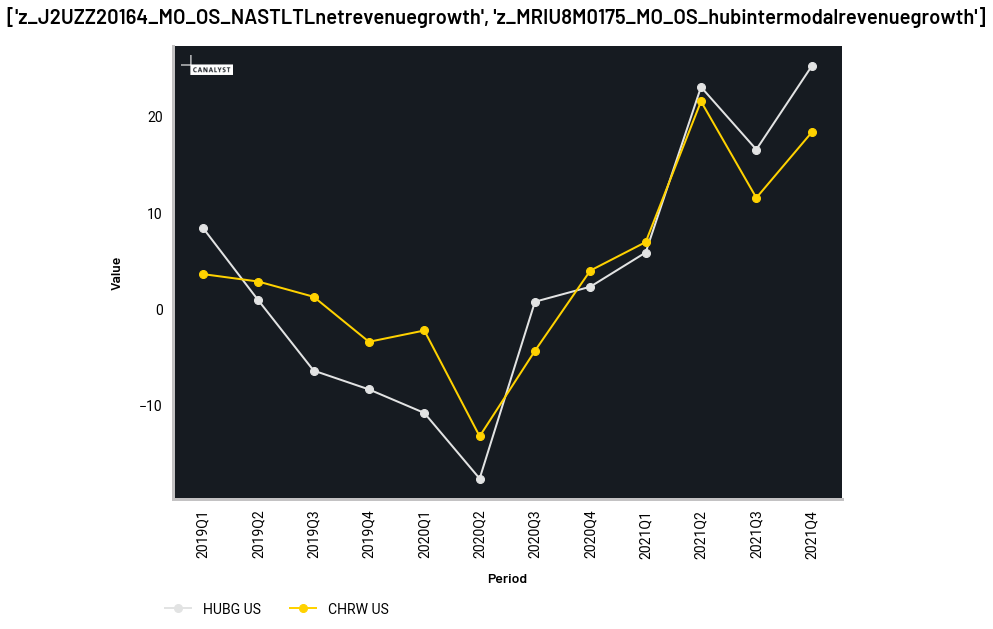

In [13]:
logistics_modelset.plot_time_series(['HUBG US','CHRW US'],['z_J2UZZ20164_MO_OS_NASTLTLnetrevenuegrowth','z_MRIU8M0175_MO_OS_hubintermodalrevenuegrowth'],mrq_notation=False,axis_labels=[['Period','Value']])

### Let's see if, instead, we can find a FRED series that is a better fit

In [14]:
df_fred = cdr.get_fred_data(['TRUCKD11'], config, quarters=True)
df_hubg = logistics_modelset.model_frame(ticker='HUBG US',
                                period_duration_type='fiscal_quarter',
                               time_series_name='z_MRIU8M0175_MO_OS_hubintermodalrevenuegrowth')
df_chrw = logistics_modelset.model_frame(ticker='CHRW US',
                                period_duration_type='fiscal_quarter',
                               time_series_name='z_J2UZZ20164_MO_OS_NASTLTLnetrevenuegrowth')

In [15]:
df_fred['quarter']=df_fred['quarter'].astype(str)
df_merge = pd.merge(df_hubg[['period_name_sorted','value']],df_fred,how='inner',left_on='period_name_sorted',right_on='quarter')
df_merge['TRUCKD11_yoy'] = df_merge['TRUCKD11'].diff(4)
df_merge = df_merge.dropna()
df_merge.tail()

,period_name_sorted,value,quarter,TRUCKD11,TRUCKD11_yoy
20,2021Q1,5.85,2021Q1,113.47,-2.97
21,2021Q2,23.05,2021Q2,112.53,3.47
22,2021Q3,16.55,2021Q3,111.67,-0.77
23,2021Q4,25.21,2021Q4,114.07,1.80
24,2022Q1,20.00,2022Q1,115.70,2.23


### Regress the first stock against FRED series, not a great fit

In [16]:
cdr.regress_dataframe(df_merge,'value','TRUCKD11_yoy',y_filter="").tables[0]

Dep. Variable:,value,R-squared:,0.229
Model:,OLS,Adj. R-squared:,0.189
Method:,Least Squares,F-statistic:,5.650
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.0281
Time:,15:27:34,Log-Likelihood:,-78.986
No. Observations:,21,AIC:,162.0
Df Residuals:,19,BIC:,164.1
Df Model:,1,,
Covariance Type:,nonrobust,,


### Regress the second stock against FRED series, not a great fit

In [17]:
df_fred['quarter']=df_fred['quarter'].astype(str)
df_merge = pd.merge(df_chrw[['period_name_sorted','value']],df_fred,how='inner',left_on='period_name_sorted',right_on='quarter')
df_merge['TRUCKD11_yoy'] = df_merge['TRUCKD11'].diff(4)
df_merge = df_merge.dropna()
cdr.regress_dataframe(df_merge,'value','TRUCKD11_yoy',y_filter="").tables[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Dep. Variable:,value,R-squared:,0.236
Model:,OLS,Adj. R-squared:,0.167
Method:,Least Squares,F-statistic:,3.400
Date:,"Fri, 18 Mar 2022",Prob (F-statistic):,0.0923
Time:,15:27:34,Log-Likelihood:,-45.263
No. Observations:,13,AIC:,94.53
Df Residuals:,11,BIC:,95.66
Df Model:,1,,
Covariance Type:,nonrobust,,


### Get earnings dates for the first stock

In [18]:
cdr.get_earnings_and_prices('HUBG',index_ticker = '^GSPC').tail()

,ticker,earnings_date,companyshortname,price_date,epsestimate,epsactual,epssurprisepct,alpha_1_day,alpha_5_day,alpha_10_day,beta_252,plus_1_return,plus_5_return,plus_10_return,mktclose_plus_1_return,mktclose_plus_5_return,mktclose_plus_10_return
48,HUBG,2021-02-04,"Hub Group, Inc.",2021-02-04,0.66,0.81,22.73,0.02,-0.04,-0.01,0.76,0.02,-0.03,0.00,0.00,0.01,0.01
49,HUBG,2021-05-05,"Hub Group, Inc.",2021-05-05,0.45,0.51,14.09,-0.01,0.03,0.01,0.96,-0.01,0.00,-0.00,0.01,-0.03,-0.01
50,HUBG,2021-07-29,"Hub Group, Inc.",2021-07-29,0.70,0.78,12.07,0.01,-0.05,-0.02,0.85,0.01,-0.05,-0.01,-0.01,0.00,0.01
51,HUBG,2021-10-28,"Hub Group, Inc.",2021-10-28,1.10,1.28,16.36,-0.01,0.05,0.04,0.91,-0.00,0.06,0.05,0.00,0.02,0.01
52,HUBG,2022-02-08,"Hub Group, Inc.",2022-02-08,1.43,2.48,73.43,0.04,0.07,0.08,0.94,0.06,0.06,0.02,0.01,-0.01,-0.07


### Get earnings dates for the second stock

In [19]:
cdr.get_earnings_and_prices('CHRW',index_ticker = '^GSPC') .tail()

,ticker,earnings_date,companyshortname,price_date,epsestimate,epsactual,epssurprisepct,alpha_1_day,alpha_5_day,alpha_10_day,beta_252,plus_1_return,plus_5_return,plus_10_return,mktclose_plus_1_return,mktclose_plus_5_return,mktclose_plus_10_return
48,CHRW,2021-01-26,"C.H. Robinson Worldwide, Inc.",2021-01-26,0.98,1.08,10.32,-0.05,-0.11,-0.07,0.55,-0.06,-0.11,-0.06,-0.03,-0.01,0.02
49,CHRW,2021-04-27,"C.H. Robinson Worldwide, Inc.",2021-04-27,0.98,1.28,30.35,-0.03,0.03,0.03,0.79,-0.03,0.03,0.03,-0.00,-0.01,-0.01
50,CHRW,2021-07-27,"C.H. Robinson Worldwide, Inc.",2021-07-27,1.33,1.44,8.03,-0.03,-0.00,-0.03,0.90,-0.03,0.00,-0.02,-0.00,0.00,0.01
51,CHRW,2021-10-26,"C.H. Robinson Worldwide, Inc.",2021-10-26,1.42,1.85,30.19,-0.00,-0.05,-0.07,0.97,-0.01,-0.04,-0.04,-0.01,0.01,0.02
52,CHRW,2022-02-02,"C.H. Robinson Worldwide, Inc.",2022-02-02,1.85,1.74,-6.15,-0.02,-0.03,-0.01,0.56,-0.03,-0.03,-0.02,-0.02,-0.00,-0.02


### Bottom line, rather than use FRED, it makes more sense to predict the first stock by the second, which reports 6 days later